<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Missing Categorical Data
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• Missing data refers to the absence of values in a dataset where information is expected. 
<br>
• It occurs when no data value is stored for a variable in an observation. 
<br>
• This can happen in various contexts such as surveys, experiments or databases.
<br>
<br>
<strong>Types of Missing Data</strong>
<br>
• <strong>Missing Completely at Random (MCAR)</strong> 
<br>
→ Missing data is entirely random and unrelated to any other observed or unobserved data. For example, if a survey respondent accidentally skips a question that data is missing completely at random.
<br>
• <strong>Missing at Random (MAR)</strong>
<br>
→ The missingness is related to the observed data but not to the missing data itself. For example, if older participants are less likely to answer questions about technology use, the missingness is related to age (observed data).
<br>
• <strong>Missing Not at Random (MNAR)</strong>
<br>
→ The missingness is related to the unobserved value itself. For instance, people with higher incomes might be less likely to report their income meaning the missingness is related to income.
<br>
<br>
<table style="border-collapse:collapse; background-color:gainsboro;">
    <tr>
        <th style="border: 2px solid black; padding: 8px; text-align:center;">Type of Missing Data</th>
        <th style="border: 2px solid black; padding: 8px; text-align:center;">Definition</th>
        <th style="border: 2px solid black; padding: 8px; text-align:center;">Recommended Techniques</th>
    </tr>
    <tr>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">MCAR</td>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">Missingness is completely random.</td>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">Complete case analysis, Mean/Mode imputation.</td>
    </tr>
    <tr>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">MAR</td>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">Missingness is related to observed data.</td>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">Multiple imputation, Regression imputation, KNN.</td>
    </tr>
    <tr>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">MNAR</td>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">Missingness is related to unobserved data.</td>
        <td style="border: 2px solid black; padding: 8px; text-align:center;">Sensitivity analysis, Pattern mixture models, Modeling the missing data mechanism.</td>
    </tr>
</table>
</div>

<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Most Frequent Imputation - Using Pandas
    </p>
</div>

---

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CSV File
df = pd.read_csv('houseprice.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
# Shape of the Data
df.shape

(1460, 3)

In [4]:
# Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [5]:
# Percentage of Null values in the Data
df.isna().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

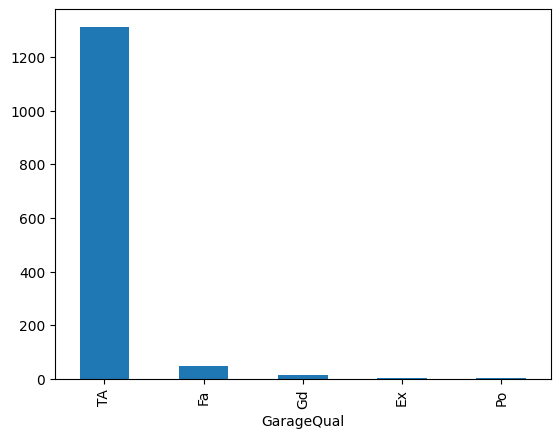

In [6]:
# Count of unique Categories in Garage Quality Column
df["GarageQual"].value_counts().plot(kind="bar")

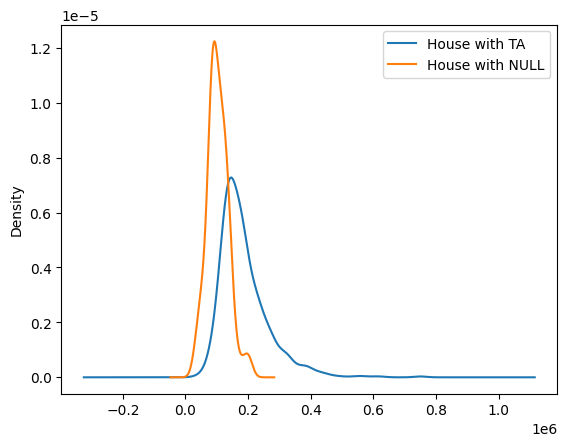

In [7]:
# Distribution of Garage with TA and Null 
df[df["GarageQual"]=='TA']["SalePrice"].plot(kind="kde", label="House with TA")
df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde", label="House with NULL")
plt.legend()
plt.show()

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
Let’s explore the two approaches, Most Frequent Imputation and Creation of a New Category for handling missing values in categorical data.
<br>
<br>
<strong>1. Most Frequent Imputation (Mode Imputation)</strong>
<br>
• Most frequent imputation involves replacing missing values in a categorical variable with the mode which is the most commonly occurring category in that variable.
<br>
<strong>Step-by-Step Process</strong>
<br>
1. Identify the Variable: Choose the categorical variable that has missing values.
<br>
2. Calculate the Mode: Determine the most frequently occurring category (mode) in the variable.
<br>
3. Impute Missing Values: Replace all missing values with the mode.
<br>
<strong>Advantages</strong>
<br>
1. Simplicity: Easy to implement and understand requires minimal computational effort.
<br>
2. Quick Processing: Efficient for small datasets or when only a few missing values need to be filled.
<br>
3. Preserves Mode: Maintains the most frequent category in the dataset which can be beneficial if the mode is a valid representation.
<br>
<br>
<strong>2. Creation of a New Category</strong>
<br>
• Instead of imputing missing values with the mode you create a new category to represent missing values explicitly.
<br>
• This could be labeled as "Unknown", "Not Specified" or any appropriate term.
<br>
<strong>Step-by-Step Process</strong>
<br>
1. Identify missing values in the categorical variable.
<br>
2. Assign a new category label to all missing values.
<br>
<strong>Advantages</strong>
<br>
1. Retention of Information: By designating a specific category for missing values you maintain information about the fact that data is missing which can be informative in analyses.
<br>
2. Avoids Bias: This approach does not introduce bias that might come from imputing missing values with the mode or other imputation methods. 
<br>
3. Preserves Variability: It allows for the representation of the true distribution of the data preserving the variability that might be lost through other imputation methods.
</div>

In [8]:
# Filling in the Missing values with Most frequent Category
df["GarageQual"] = df["GarageQual"].fillna("TA")

<Axes: xlabel='GarageQual'>

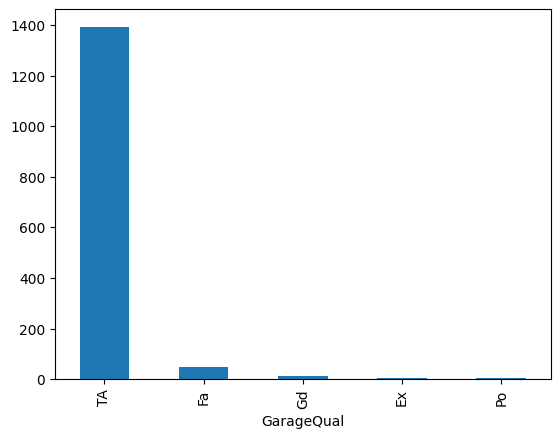

In [10]:
# Count of unique Categories in Garage Quality Column after Imputation
df["GarageQual"].value_counts().plot(kind="bar")

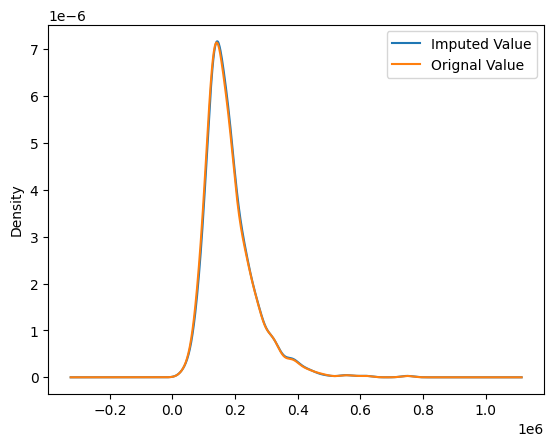

In [11]:
# Distribution after Missing value Imputation
df[df["GarageQual"]=='TA']["SalePrice"].plot(kind="kde", label="Imputed Value")
df["SalePrice"].plot(kind="kde", label="Orignal Value")
plt.legend()
plt.show()

<Axes: xlabel='FireplaceQu'>

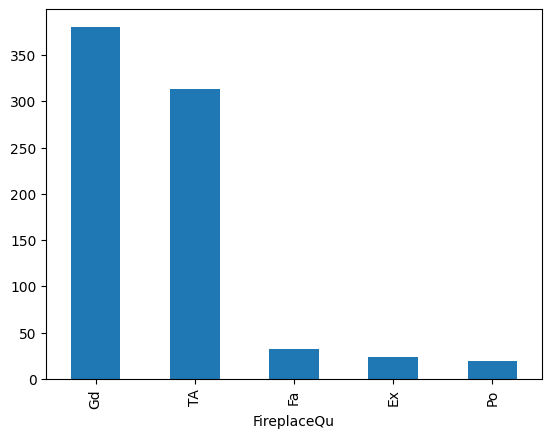

In [12]:
# Count of unique Categories in Fireplace Quality Column
df["FireplaceQu"].value_counts().plot(kind="bar")

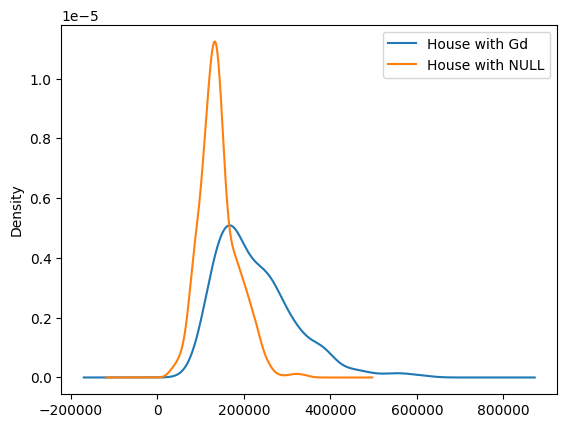

In [13]:
# Distribution of Fireplace with Gd and Null 
df[df["FireplaceQu"]=='Gd']["SalePrice"].plot(kind="kde", label="House with Gd")
df[df["FireplaceQu"].isnull()]["SalePrice"].plot(kind="kde", label="House with NULL")
plt.legend()
plt.show()

In [14]:
# Filling in the Missing values with Most frequent Category
df["FireplaceQu"] = df["FireplaceQu"].fillna("Gd")

<Axes: xlabel='FireplaceQu'>

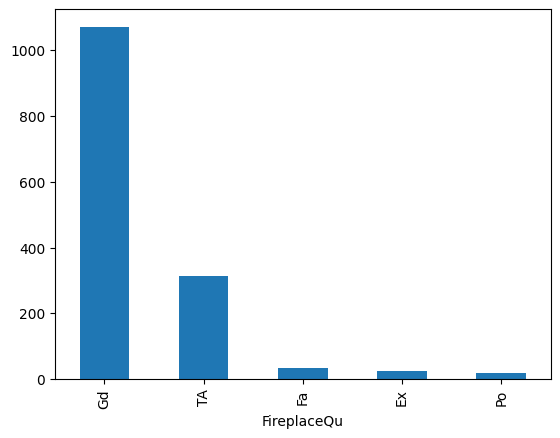

In [15]:
# Count of unique Categories in Fireplace Quality Column after Imputation
df["FireplaceQu"].value_counts().plot(kind="bar")

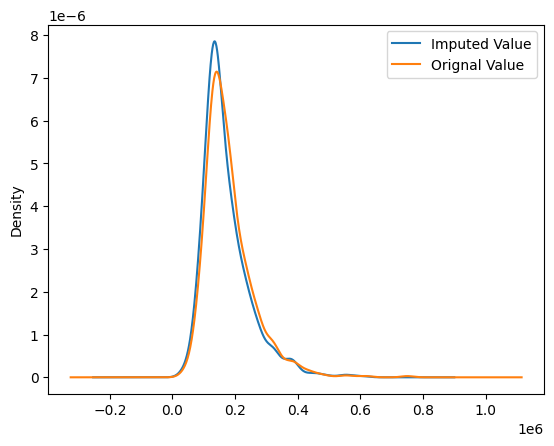

In [16]:
# Distribution after Missing value Imputation
df[df["FireplaceQu"]=='Gd']["SalePrice"].plot(kind="kde", label="Imputed Value")
df["SalePrice"].plot(kind="kde", label="Orignal Value")
plt.legend()
plt.show()

<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Most Frequent Imputation - Using Sklearn
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• The SimpleImputer is a class in scikit-learn that provides basic strategies for imputing missing values. 
<br>
• For categorical data, you can use the strategy → "most_frequent" to fill missing values with the mode.
<br>
<br>
<strong>1. Most Frequent Imputation</strong>
<br>
• Most frequent imputation involves replacing missing values in a categorical variable with the mode which is the most commonly occurring category in that variable.
<br>
<strong>Step-by-Step Process</strong>
<br>
1. Import Necessary Libraries: You need to have pandas for data manipulation and SimpleImputer from scikit-learn for imputation.
<br>
2. Import Your Dataset: Import your Dataset you want to work on.
<br>
3. Initialize the SimpleImputer: Create SimpleImputer object with strategy parameter as most_frequent.
<br>
4. Fit the Imputer: Fit it to your data to learn the mode.
<br>
5. Transform the Data: Replace missing values with the mode.
<br>
<br>
<strong>2. Creation of a New Category</strong>
<br>
• Instead of imputing missing values with the mode you create a new category to represent missing values explicitly.
<br>
• This could be labeled as "Unknown", "Not Specified" or any appropriate term.
<br>
<strong>Step-by-Step Process</strong>
<br>
1. Import Necessary Libraries: You need pandas for data manipulation and SimpleImputer from scikit-learn for handling missing values.
<br>
2. Import Your Dataset: Import your Dataset you want to work on.
<br>
3. Initialize the Simple Imputer: Create SimpleImputer object with strategy parameter as constant and fill_value as "Missing" or anything else.
<br>
4. Fit and Transform the Data: Replace missing values with the new category.
<br>
<br>
<strong>Advantages of Using SimpleImputer</strong>
<br>
1. Ease of Use: The SimpleImputer is easy to implement with just a few lines of code.
<br>
2. Built-in Functionality: Handles the underlying calculations for mode and imputes missing values seamlessly.
<br>
3. Scalability: Works well with larger datasets and can easily be integrated into machine learning pipelines.
</div>

In [17]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [18]:
# Defining Features and Target Variables
X = df.drop(columns=["SalePrice"], axis=0)
y = df["SalePrice"]

In [19]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
# Shape of Training and Testing Set
print(X_train.shape, X_test.shape)

(1022, 2) (438, 2)


In [21]:
# Importing SimpleImputer
from sklearn.impute import SimpleImputer

In [22]:
# SimpleImputer Object with Strategy is equal to "mostfrequent"
imputer = SimpleImputer(strategy="most_frequent")

In [23]:
# Fitting and Transforming Training Data Only
X_train_imputed = imputer.fit_transform(X_train)

In [24]:
# Transforming Testing Data
X_test_imputed = imputer.transform(X_test)

In [25]:
# Parameter for Finding the Most Frequent Value
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Missing Category Imputation - Using Pandas
    </p>
</div>

---

In [26]:
# Reading CSV File
df = pd.read_csv("houseprice.csv", usecols=['GarageQual','FireplaceQu','SalePrice'])
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
325,NaN,TA,87000
123,NaN,TA,153900
1447,TA,TA,240000
144,NaN,TA,125000
371,Gd,TA,134432


In [27]:
# Percent of Null values in the Data
df.isna().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

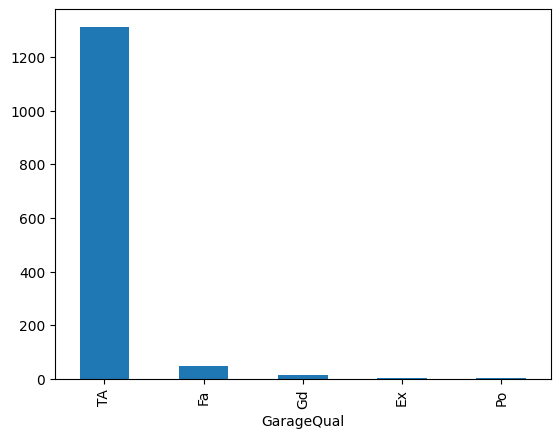

In [28]:
# Count of unique Categories in GarageQuality Column
df["GarageQual"].value_counts().plot(kind="bar")

In [29]:
# Filling in the Missing values with "Missing"
df["GarageQual"] = df["GarageQual"].fillna("Missing")

<Axes: xlabel='GarageQual'>

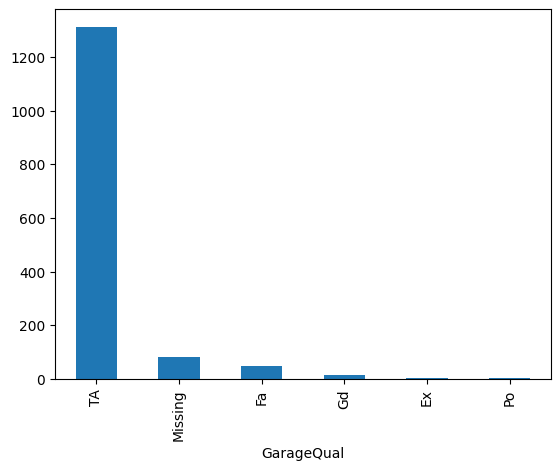

In [30]:
# Count of unique Categories in GarageQuality Column after Imputation
df["GarageQual"].value_counts().plot(kind="bar")

<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Missing Category Imputation - Using Sklearn
    </p>
</div>

---

In [31]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
# SimpleImputer Object with Strategy is equal to "constant" and fill_value is "missing"
imputer = SimpleImputer(strategy="constant", fill_value="Missing")

In [33]:
# Fitting and Transforming Training Data Only
X_train_imputed = imputer.fit_transform(X_train)

In [34]:
# Transforming Testing Data
X_test_imputed = imputer.transform(X_test)

In [35]:
# Parameter for Finding the Constant value used for Imputation
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)